In [2]:
!pip install pandas numpy matplotlib statsmodels prophet

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 606.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 2.3 MB/s eta 0:00:05
   ---------------------------------------- 0.1/9.9 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.9 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.9 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.9 MB 1.9 MB/s eta 0:00:05
   --- --------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\wgras\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
# 1. Load the dataset
data = pd.read_csv('./data/BrentOilPrices.csv')

In [5]:
# 2. Preprocess the data
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

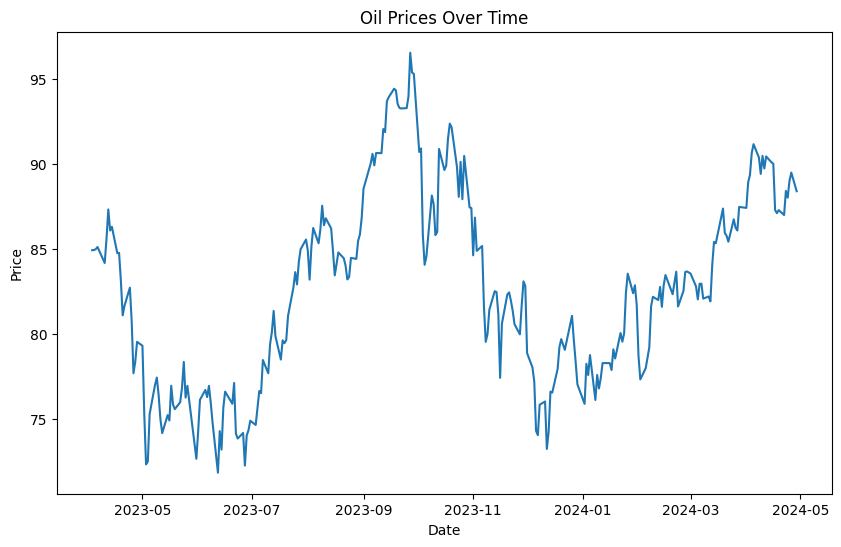

In [6]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Price'])
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
# Split data into training and test sets
split = int(0.8 * len(data))
train, test = data[:split], data[split:]

In [8]:
# 3. ARIMA Model
# Define and fit the ARIMA model
arima_order = (5, 1, 0)  # Example order (p, d, q)
arima_model = ARIMA(train['Price'], order=arima_order)
arima_model_fit = arima_model.fit()

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

In [9]:
# Forecast
arima_forecast = arima_model_fit.forecast(steps=len(test))

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [10]:
# Evaluate the ARIMA model
arima_mse = mean_squared_error(test['Price'], arima_forecast)
print(f'ARIMA Mean Squared Error: {arima_mse}')

ARIMA Mean Squared Error: 30.86258372085319


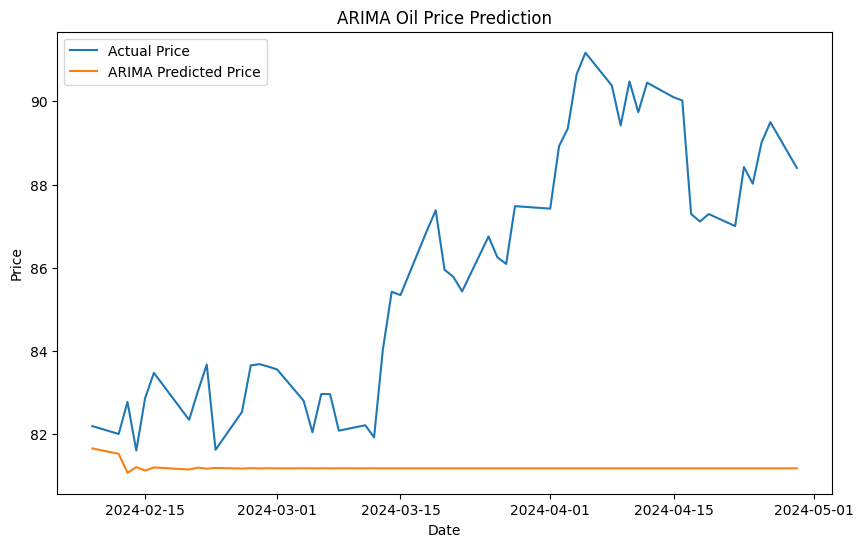

In [11]:
# Plot ARIMA predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, arima_forecast, label='ARIMA Predicted Price')
plt.title('ARIMA Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# 3. SARIMA Model
# Define and fit the SARIMA model
sarima_order = (1, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 12)  # P, D, Q, S (seasonal period 12 for monthly data, adjust accordingly)
sarima_model = SARIMAX(train['Price'], order=sarima_order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit(disp=False)

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-st

In [13]:
# Forecast
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


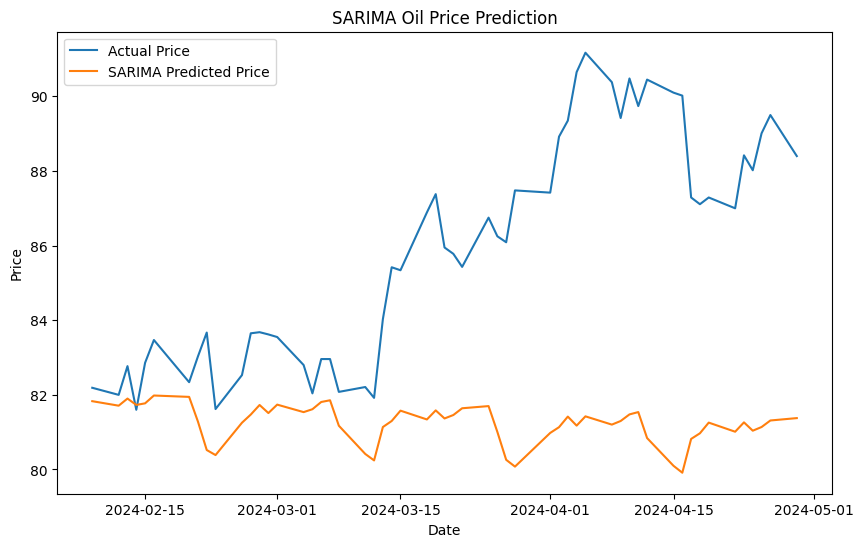

In [14]:
# Plot SARIMA predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, sarima_forecast, label='SARIMA Predicted Price')
plt.title('SARIMA Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wgras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-st

SARIMAX Mean Squared Error: 31.96504298006784


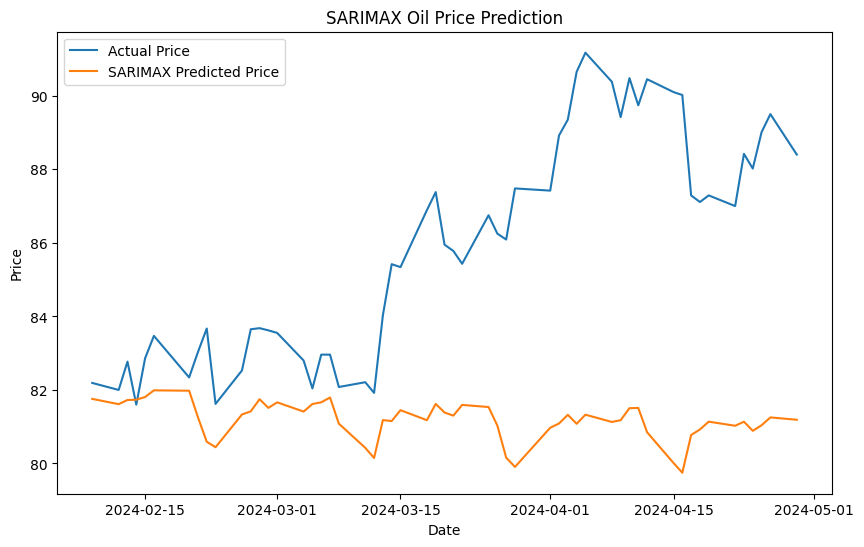

In [15]:
# 4. SARIMAX Model (optional, with exogenous variables if available)
# If you have exogenous variables, include them here. For demonstration, we'll assume an exogenous variable 'exog_var'
# Generate a dummy exogenous variable for the example
# Replace this with your actual exogenous data
train_exog = np.random.rand(len(train))
test_exog = np.random.rand(len(test))

# Define and fit the SARIMAX model
sarimax_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
sarimax_model = SARIMAX(train['Price'], exog=train_exog, order=sarimax_order, seasonal_order=seasonal_order)
sarimax_model_fit = sarimax_model.fit(disp=False)

# Forecast
sarimax_forecast = sarimax_model_fit.forecast(steps=len(test), exog=test_exog)

# Evaluate the SARIMAX model
sarimax_mse = mean_squared_error(test['Price'], sarimax_forecast)
print(f'SARIMAX Mean Squared Error: {sarimax_mse}')

# Plot SARIMAX predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, sarimax_forecast, label='SARIMAX Predicted Price')
plt.title('SARIMAX Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
# 4. Facebook Prophet Model
# Prepare the data for Prophet
prophet_data = data.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})

In [17]:
# Define and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data[:split])

22:56:27 - cmdstanpy - INFO - Chain [1] start processing
22:56:28 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Make future dataframe and forecast
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
forecast = prophet_model.predict(future)

In [19]:
# Evaluate the Prophet model
prophet_forecast = forecast.set_index('ds').loc[test.index]['yhat']
prophet_mse = mean_squared_error(test['Price'], prophet_forecast)
print(f'Prophet Mean Squared Error: {prophet_mse}')

KeyError: "[Timestamp('2024-04-04 00:00:00'), Timestamp('2024-04-05 00:00:00'), Timestamp('2024-04-08 00:00:00'), Timestamp('2024-04-09 00:00:00'), Timestamp('2024-04-10 00:00:00'), Timestamp('2024-04-11 00:00:00'), Timestamp('2024-04-12 00:00:00'), Timestamp('2024-04-15 00:00:00'), Timestamp('2024-04-16 00:00:00'), Timestamp('2024-04-17 00:00:00'), Timestamp('2024-04-18 00:00:00'), Timestamp('2024-04-19 00:00:00'), Timestamp('2024-04-22 00:00:00'), Timestamp('2024-04-23 00:00:00'), Timestamp('2024-04-24 00:00:00'), Timestamp('2024-04-25 00:00:00'), Timestamp('2024-04-26 00:00:00'), Timestamp('2024-04-29 00:00:00')] not in index"

NameError: name 'prophet_forecast' is not defined

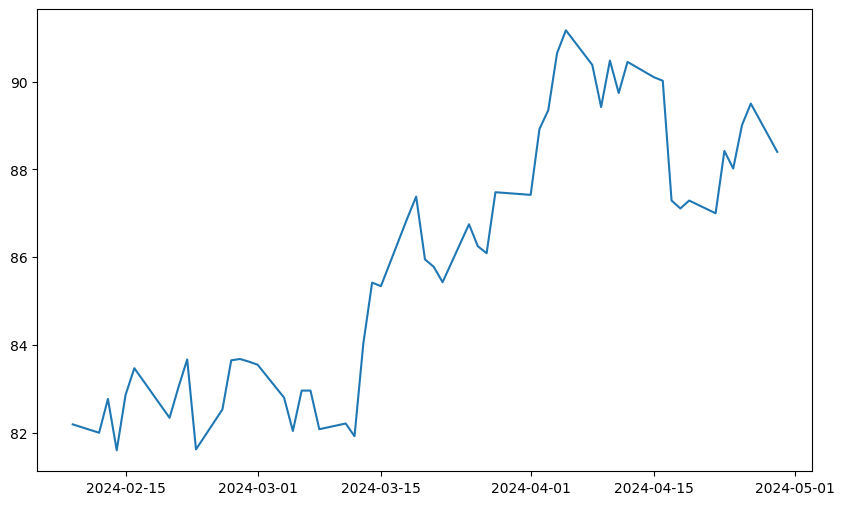

In [20]:
# Plot Prophet predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual Price')
plt.plot(test.index, prophet_forecast, label='Prophet Predicted Price')
plt.title('Prophet Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
